# Least square problem for polynomial regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

x: [-10.        -9.97998   -9.95996   -9.93994   -9.91992   -9.8999
  -9.87988   -9.85986   -9.83984   -9.81982   -9.7998    -9.77978
  -9.75976   -9.73974   -9.71972   -9.6997    -9.67968   -9.65966
  -9.63964   -9.61962   -9.5996    -9.57958   -9.55956   -9.53954
  -9.51952   -9.499499  -9.479479  -9.459459  -9.439439  -9.419419
  -9.399399  -9.379379  -9.359359  -9.339339  -9.319319  -9.299299
  -9.279279  -9.259259  -9.239239  -9.219219  -9.199199  -9.179179
  -9.159159  -9.139139  -9.119119  -9.099099  -9.079079  -9.059059
  -9.039039  -9.019019  -8.998999  -8.978979  -8.958959  -8.938939
  -8.918919  -8.898899  -8.878879  -8.858859  -8.838839  -8.818819
  -8.798799  -8.778779  -8.758759  -8.738739  -8.718719  -8.698699
  -8.678679  -8.658659  -8.638639  -8.618619  -8.598599  -8.578579
  -8.558559  -8.538539  -8.518519  -8.498498  -8.478478  -8.458458
  -8.438438  -8.418418  -8.398398  -8.378378  -8.358358  -8.338338
  -8.318318  -8.298298  -8.278278  -8.258258  -8.238238  -8.2182

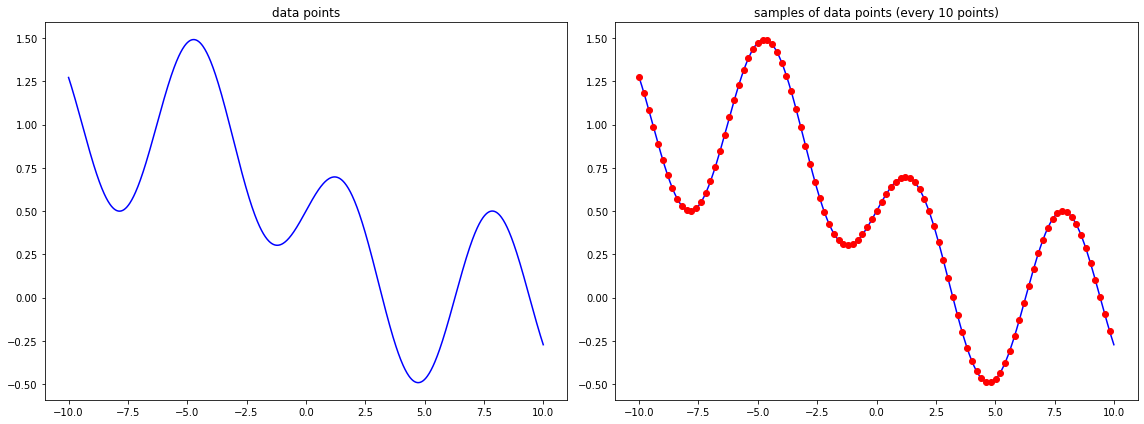

In [48]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

print('x:', x)
print('y:', y)

x_sample    = x[::10]       
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

In [38]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p])
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(n):
      for j in range(p):
        A[i][j] = np.power(x[i],j)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return A


## construct vector $b$

In [50]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    b = np.reshape(y,(n,1))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b


## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [62]:
def solve_regression(x, y, p):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x,p)
    b = construct_vector_b(y)
    A_transpose = A.transpose()
    z_left = np.linalg.inv(np.matmul(A_transpose, A))
    z_right = np.matmul(A_transpose, b)
    z = np.matmul(z_left, z_right)
    n = z.shape[0]
    mult_Az = np.matmul(A,z)
    loss_left = (mult_Az-b).transpose()
    loss = (np.matmul(loss_left,mult_Az-b).item())/(2*n)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

print('result', solve_regression(x,y,5))

result (array([[ 5.00000000e-01],
       [-1.35157490e-01],
       [-6.22917127e-16],
       [ 1.23659031e-03],
       [ 6.41284404e-18]]), 10.539561372651885)


- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [71]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x,p)
    n = A.shape[0]
    b = construct_vector_b(y)
    A_transpose = A.transpose()
    I = np.zeros([p,p])
    np.fill_diagonal(I, n*alpha)
    z_left = np.linalg.inv(np.matmul(A_transpose, A)+I)
    z_right = np.matmul(A_transpose, b)
    z = np.matmul(z_left, z_right)

    mult_Az = np.matmul(A,z)
    data_fidelity_left = (mult_Az-b).transpose()
    data_fidelity = (np.matmul(data_fidelity_left,mult_Az-b).item())/(2*n)
    regularization = (np.matmul(z.transpose(),z).item()*alpha)/2
    loss = data_fidelity + regularization

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

solve_regression_with_regularization(x,y,5,2)

0.08347373067143199
0.0140554799741059


(array([[ 0.06307635],
        [-0.09834701],
        [ 0.02010386],
        [ 0.00072226],
        [-0.00017963]]),
 0.09752921064553789)

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [ ]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [ ]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss

___

___

## functions for presenting the results

___

___

In [ ]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [ ]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [ ]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [ ]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [ ]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [ ]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

In [ ]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)